In [1]:
%matplotlib widget
# Switches the backend so the plots are interactive

In [2]:
# Muestra los valores más anómalos del fichero csv suministrado

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
import joblib

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input

In [3]:
# Cargar los datos
df = pd.read_csv("../datos.csv",index_col=0,parse_dates=True)
df

,value
timestamp,
2013-07-04 00:00:00,69.880835
2013-07-04 01:00:00,71.220227
2013-07-04 02:00:00,70.877805
2013-07-04 03:00:00,68.959400
2013-07-04 04:00:00,69.283551
...,...
2014-05-28 11:00:00,72.370206
2014-05-28 12:00:00,72.172956
2014-05-28 13:00:00,72.046565


In [4]:
# Check the shape of the dataframe (exluding the index column) :
print(df.shape) # (7267,1) (según el fichero cambiará el número de filas)

(7267, 1)


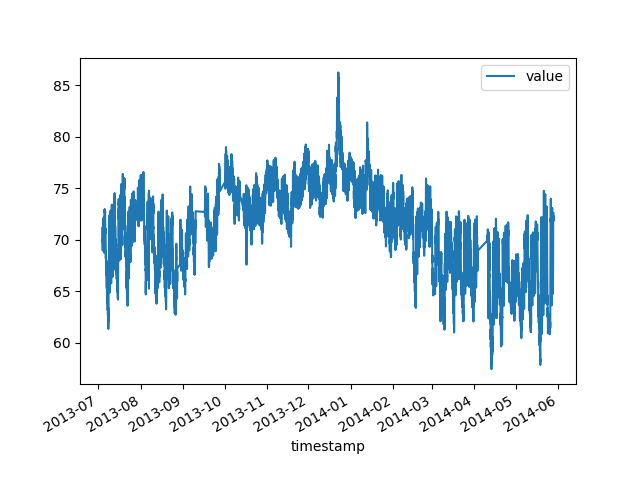

In [5]:
df.plot()
plt.show()

# 1. Construcción de modelo LSTM y detección de anomalías
* **a. Construcción de modelo básico LSTM (2 puntos). En este apartado se 
construirá un modelo con redes LSTM. La red tomará como entrada 
secuencias de datos (ventanas) del fichero con un tamaño determinado, por 
ejemplo [69.88, 71.22, 70.87] y devolverá una predicción del siguiente valor 
de la secuencia (p.ej. [68.86]).**  

---

In [6]:
# Crear las ventanas temporales
# Lo que se predice (y) es el "siguiente" valor de la secuencia
# pasando la ventana actual que tenemos.

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)


In [7]:
# define input sequence
raw_seq = df['value'].to_numpy() # convertimos la columna del df a array numpy
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps 
n_steps = 3 # definicion del tamanio de la ventana
# split into samples
X, y = split_sequence(raw_seq, n_steps)
X, y

(array([[69.88083514, 71.22022706, 70.87780496],
        [71.22022706, 70.87780496, 68.95939994],
        [70.87780496, 68.95939994, 69.28355102],
        ...,
        [70.45571697, 72.37020644, 72.17295622],
        [72.37020644, 72.17295622, 72.04656545],
        [72.17295622, 72.04656545, 71.82522648]], shape=(7264, 3)),
 array([68.95939994, 69.28355102, 70.06096581, ..., 72.04656545,
        71.82522648, 72.58408858], shape=(7264,)))

In [8]:
# Redimensionar los datos para la RNN (espera tres dimensiones)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1 # analizamos una sola variable (temperatura)
X = X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[69.88083514],
        [71.22022706],
        [70.87780496]],

       [[71.22022706],
        [70.87780496],
        [68.95939994]],

       [[70.87780496],
        [68.95939994],
        [69.28355102]],

       ...,

       [[70.45571697],
        [72.37020644],
        [72.17295622]],

       [[72.37020644],
        [72.17295622],
        [72.04656545]],

       [[72.17295622],
        [72.04656545],
        [71.82522648]]], shape=(7264, 3, 1))

In [9]:
# define model (Crear la RNN)
model = Sequential()
model.add(Input(shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
# fit model (Entrenar la RNN)
model.fit(X, y, epochs=200)

Epoch 1/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 831.1691 
Epoch 2/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0812
Epoch 3/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0694
Epoch 4/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0499
Epoch 5/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0486
Epoch 6/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0280
Epoch 7/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0149
Epoch 8/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0014
Epoch 9/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0175
Epoch 10/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9823
Epoch 11/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9543
Epoch 12/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9068
Epoch 13/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8986
Epoch 14/200
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8807
Epoch 15/200
227/227 ━━━━━━━━━━━━━━━━━━━

In [11]:
# demonstrate prediction
#x_input = np.array([70.30750511, 70.24625215, 69.85490839])
x_input = np.array([69.88083514, 71.22022706, 70.87780496])

x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input)
print(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
[[70.911446]]


# Deteccion de anomalias

In [56]:
# Un posible criterio de anomalía
# Calcular el error absoluto medio (MAE) de los "siguientes" valores de cada secuencia 
# y los valores predichos
# Calcular el promedio del MAE
# mae = np.mean(mae)

In [12]:
# Mostrar la gráfica con las anomalías
windows_size=10 # the number of initial values ignored for prediction

fechas_test=df[windows_size:].index.to_numpy() # aquí tengo array con fechas de los datos de test
fechas_test.shape


(7257,)

In [13]:
# Predecimos todos los valores empezando con el cuarto
y_pred = model.predict(X)
# ajustamos el tamanio del array de predicciones para que sea compatible con y_test 
# (teniendo en cuenta windows_size)
y_pred = y_pred[(windows_size-n_steps):] 
y_pred


227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[69.000435],
       [69.66186 ],
       [70.358406],
       ...,
       [72.1342  ],
       [71.99633 ],
       [71.80332 ]], shape=(7257, 1), dtype=float32)

In [14]:
# Anomalías de ejemplo
anomalies = np.array([True if i % 100 == 0 else False for i in range(len(fechas_test))], dtype=bool)
anomalies


array([ True, False, False, ..., False, False, False], shape=(7257,))

In [15]:
# Opcion 1
y_test=df["value"][windows_size:]
y_test

timestamp
2013-07-04 10:00:00    69.965062
2013-07-04 11:00:00    70.556195
2013-07-04 12:00:00    70.307505
2013-07-04 13:00:00    70.246252
2013-07-04 14:00:00    69.854908
                         ...    
2014-05-28 11:00:00    72.370206
2014-05-28 12:00:00    72.172956
2014-05-28 13:00:00    72.046565
2014-05-28 14:00:00    71.825226
2014-05-28 15:00:00    72.584089
Name: value, Length: 7257, dtype: float64

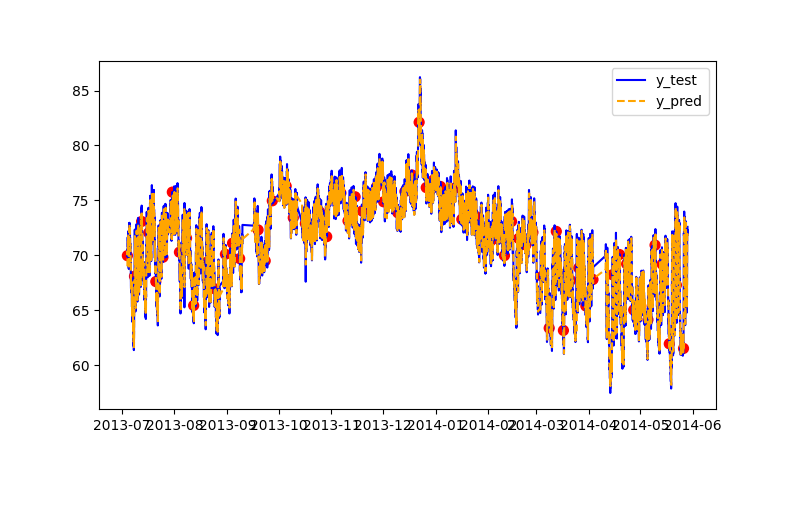

In [16]:
plt.clf() # Clear the current figure
plt.plot(fechas_test, y_test, color='blue', label='y_test')
plt.plot(fechas_test, y_pred, color='orange', linestyle='--', label='y_pred')


# los valores de anomalias en el array anomalies se refieren a las ventanas, no a "y"
# aunque hay el mismo numero de ventanas que de valores
plt.scatter(x=fechas_test, y=y_test, c='red', alpha=anomalies.astype(int), s=50)
plt.legend()
plt.show()